## Project Name:Customer Purchase Prediction Using Decision Tree Classifier



### By Mehul Chafekar


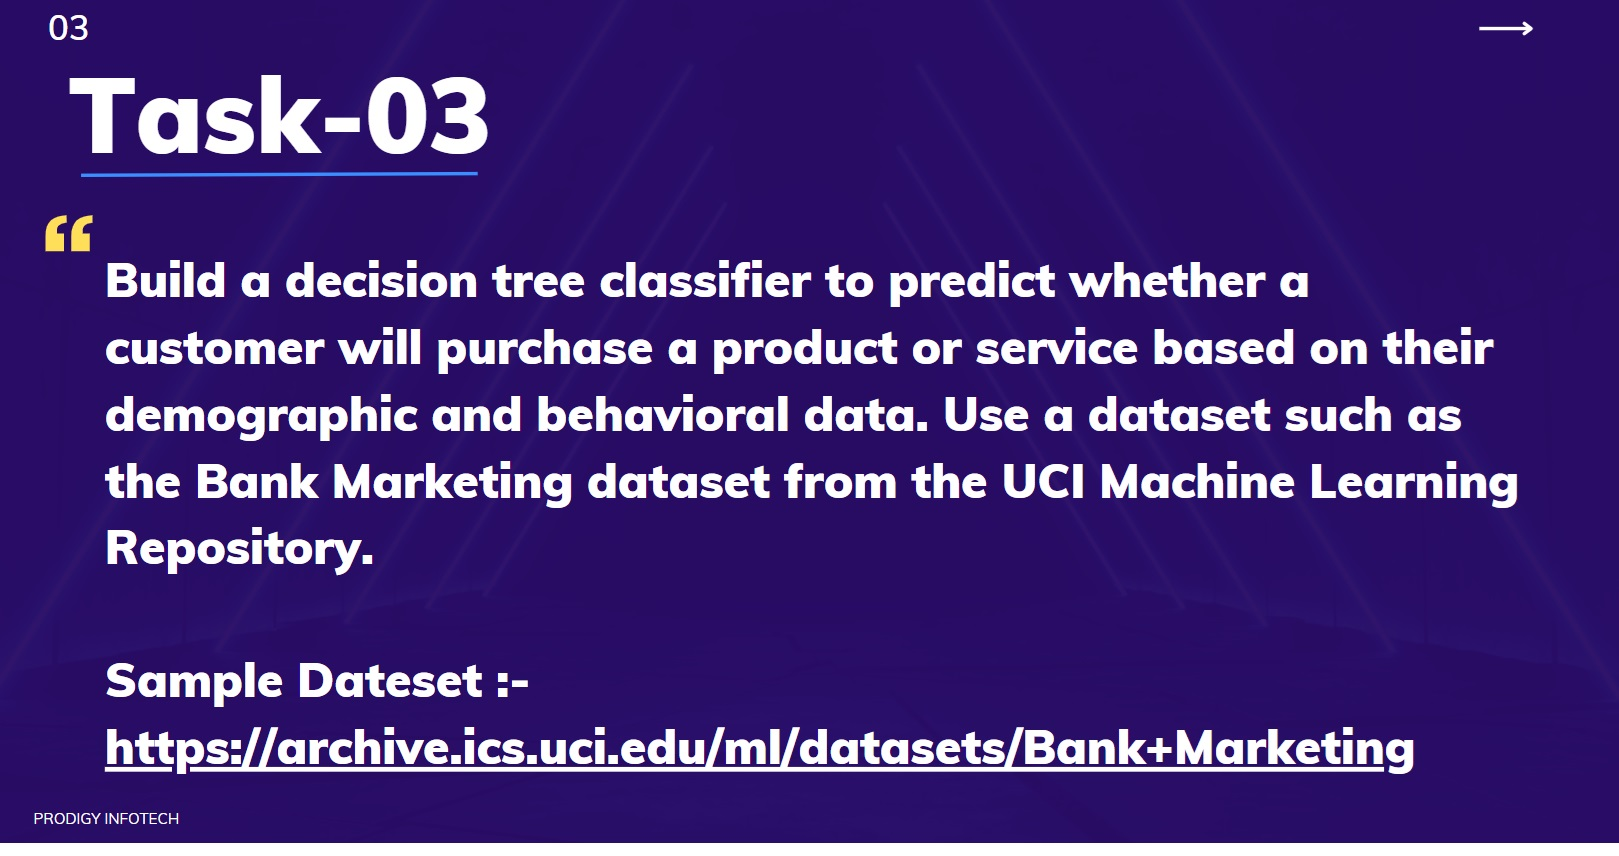

## Project Introduction

- The ability to predict customer purchase behavior is a critical aspect of business success, enabling organizations to tailor marketing strategies, optimize resources, and enhance customer experiences. 
- This project aims to build a Decision Tree Classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. 
- The dataset used for this project is the Bank Marketing dataset, sourced from the UCI Machine Learning Repository. It includes diverse features such as age, job type, marital status, education level, and past interactions, providing a comprehensive view of customer profiles.

## Project Summary

- This project involves analyzing customer data, identifying patterns, and applying machine learning techniques to build a predictive model. 
- The dataset is preprocessed to handle missing values, remove outliers, and encode categorical variables.
- Exploratory data analysis is conducted to understand feature distributions and correlations. 
- Using a Decision Tree Classifier, the model predicts whether a customer will purchase a product or service. 
- The model's performance is evaluated using accuracy scores, confusion matrices, and visualization of decision-making processes.
- The project also explores hyperparameter tuning to optimize the model's performance.




## Business Objective

The primary objective is to assist businesses in:

- Predicting customer purchases based on their demographic and behavioral data.
- Enhancing marketing efficiency by identifying high-potential customers for targeted campaigns.
- Optimizing resources by focusing on customers most likely to convert, reducing marketing costs.
- Improving customer experience by personalizing offers and services based on predictive insights.

## Importing Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 
%matplotlib inline

## Loading the Dataset

In [2]:
df= pd.read_csv('bank-additional.csv',delimiter=';')
df.rename(columns={'y':'deposit'},inplace=True)
df
                   

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


## Understanding the Data

In [3]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [4]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [5]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
2725,59,blue-collar,married,basic.4y,unknown,no,no,cellular,jun,wed,...,1,999,1,failure,-2.9,92.963,-40.8,1.260,5076.2,yes
1484,28,admin.,single,university.degree,no,no,no,cellular,aug,wed,...,1,999,0,nonexistent,-2.9,92.201,-31.4,0.879,5076.2,no
291,46,admin.,married,professional.course,no,no,no,cellular,apr,fri,...,1,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no
216,43,management,married,university.degree,unknown,yes,yes,cellular,apr,fri,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
2315,30,admin.,married,university.degree,no,no,no,cellular,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no


## Info of the dataframe

In [6]:
print("\nInfo of the dataframe:")
df.info()


Info of the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf

## Shape of the dataframe

In [7]:
print("Shape of the dataframe:", df.shape)

Shape of the dataframe: (4119, 21)


## Columns of the dataframe

In [8]:
print("\nColumns of the dataframe:")
print(df.columns)



Columns of the dataframe:
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')


## Datatypes of the columns

In [9]:
print("\nDatatypes of the columns:")
df.dtypes


Datatypes of the columns:


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
deposit            object
dtype: object

## Value counts of datatypes

In [10]:
print("\nValue counts of datatypes:")
df.dtypes.value_counts()


Value counts of datatypes:


object     11
int64       5
float64     5
dtype: int64

## Number of duplicated rows

In [11]:
print("\nNumber of duplicated rows:", df.duplicated().sum())




Number of duplicated rows: 0


## find the Number of missing values in each column

In [12]:
# Check for missing values 
print("\nNumber of missing values in each column:")
print(df.isnull().sum())


Number of missing values in each column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64


## Separating Categorical and Numerical Columns

In [13]:
# Identifying categorical and numerical columns
categorical_cols = df.select_dtypes(include=('object')).columns
numerical_cols = df.select_dtypes(exclude=('object')).columns

print("\nCategorical columns:")
print(categorical_cols)

print("\nNumerical columns:")
print(numerical_cols)


Categorical columns:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')

Numerical columns:
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


## Description of the dataframe

In [14]:
print("\nDescription of the dataframe:")
df.describe()


Description of the dataframe:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [15]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


## Histogram Plot for Numerical Columns

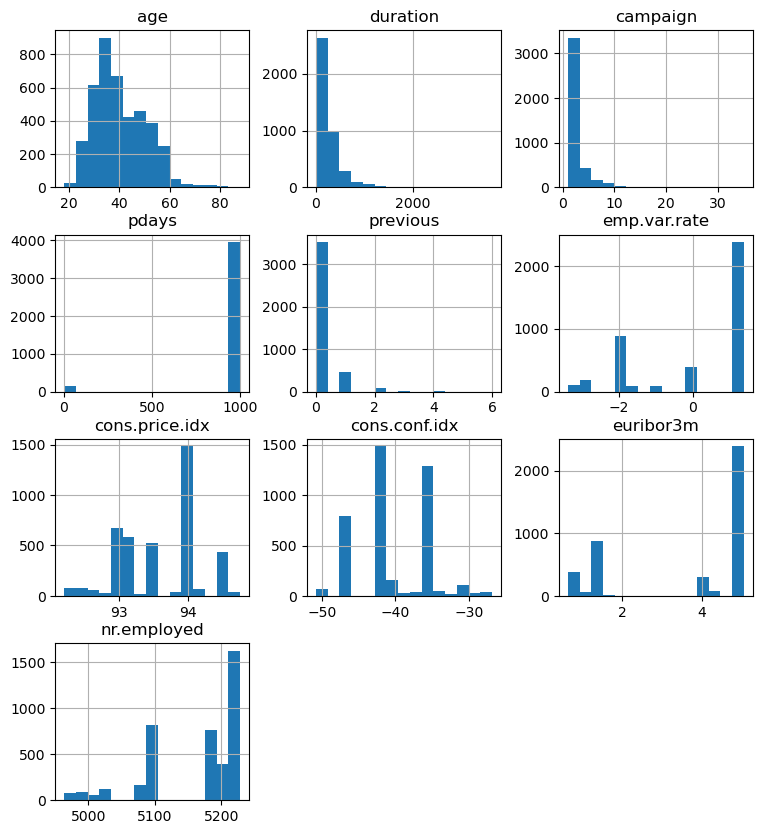

In [16]:
df[numerical_cols].hist(bins=15, figsize=(9, 10))
plt.show()

## Countplot for Categorical Columns

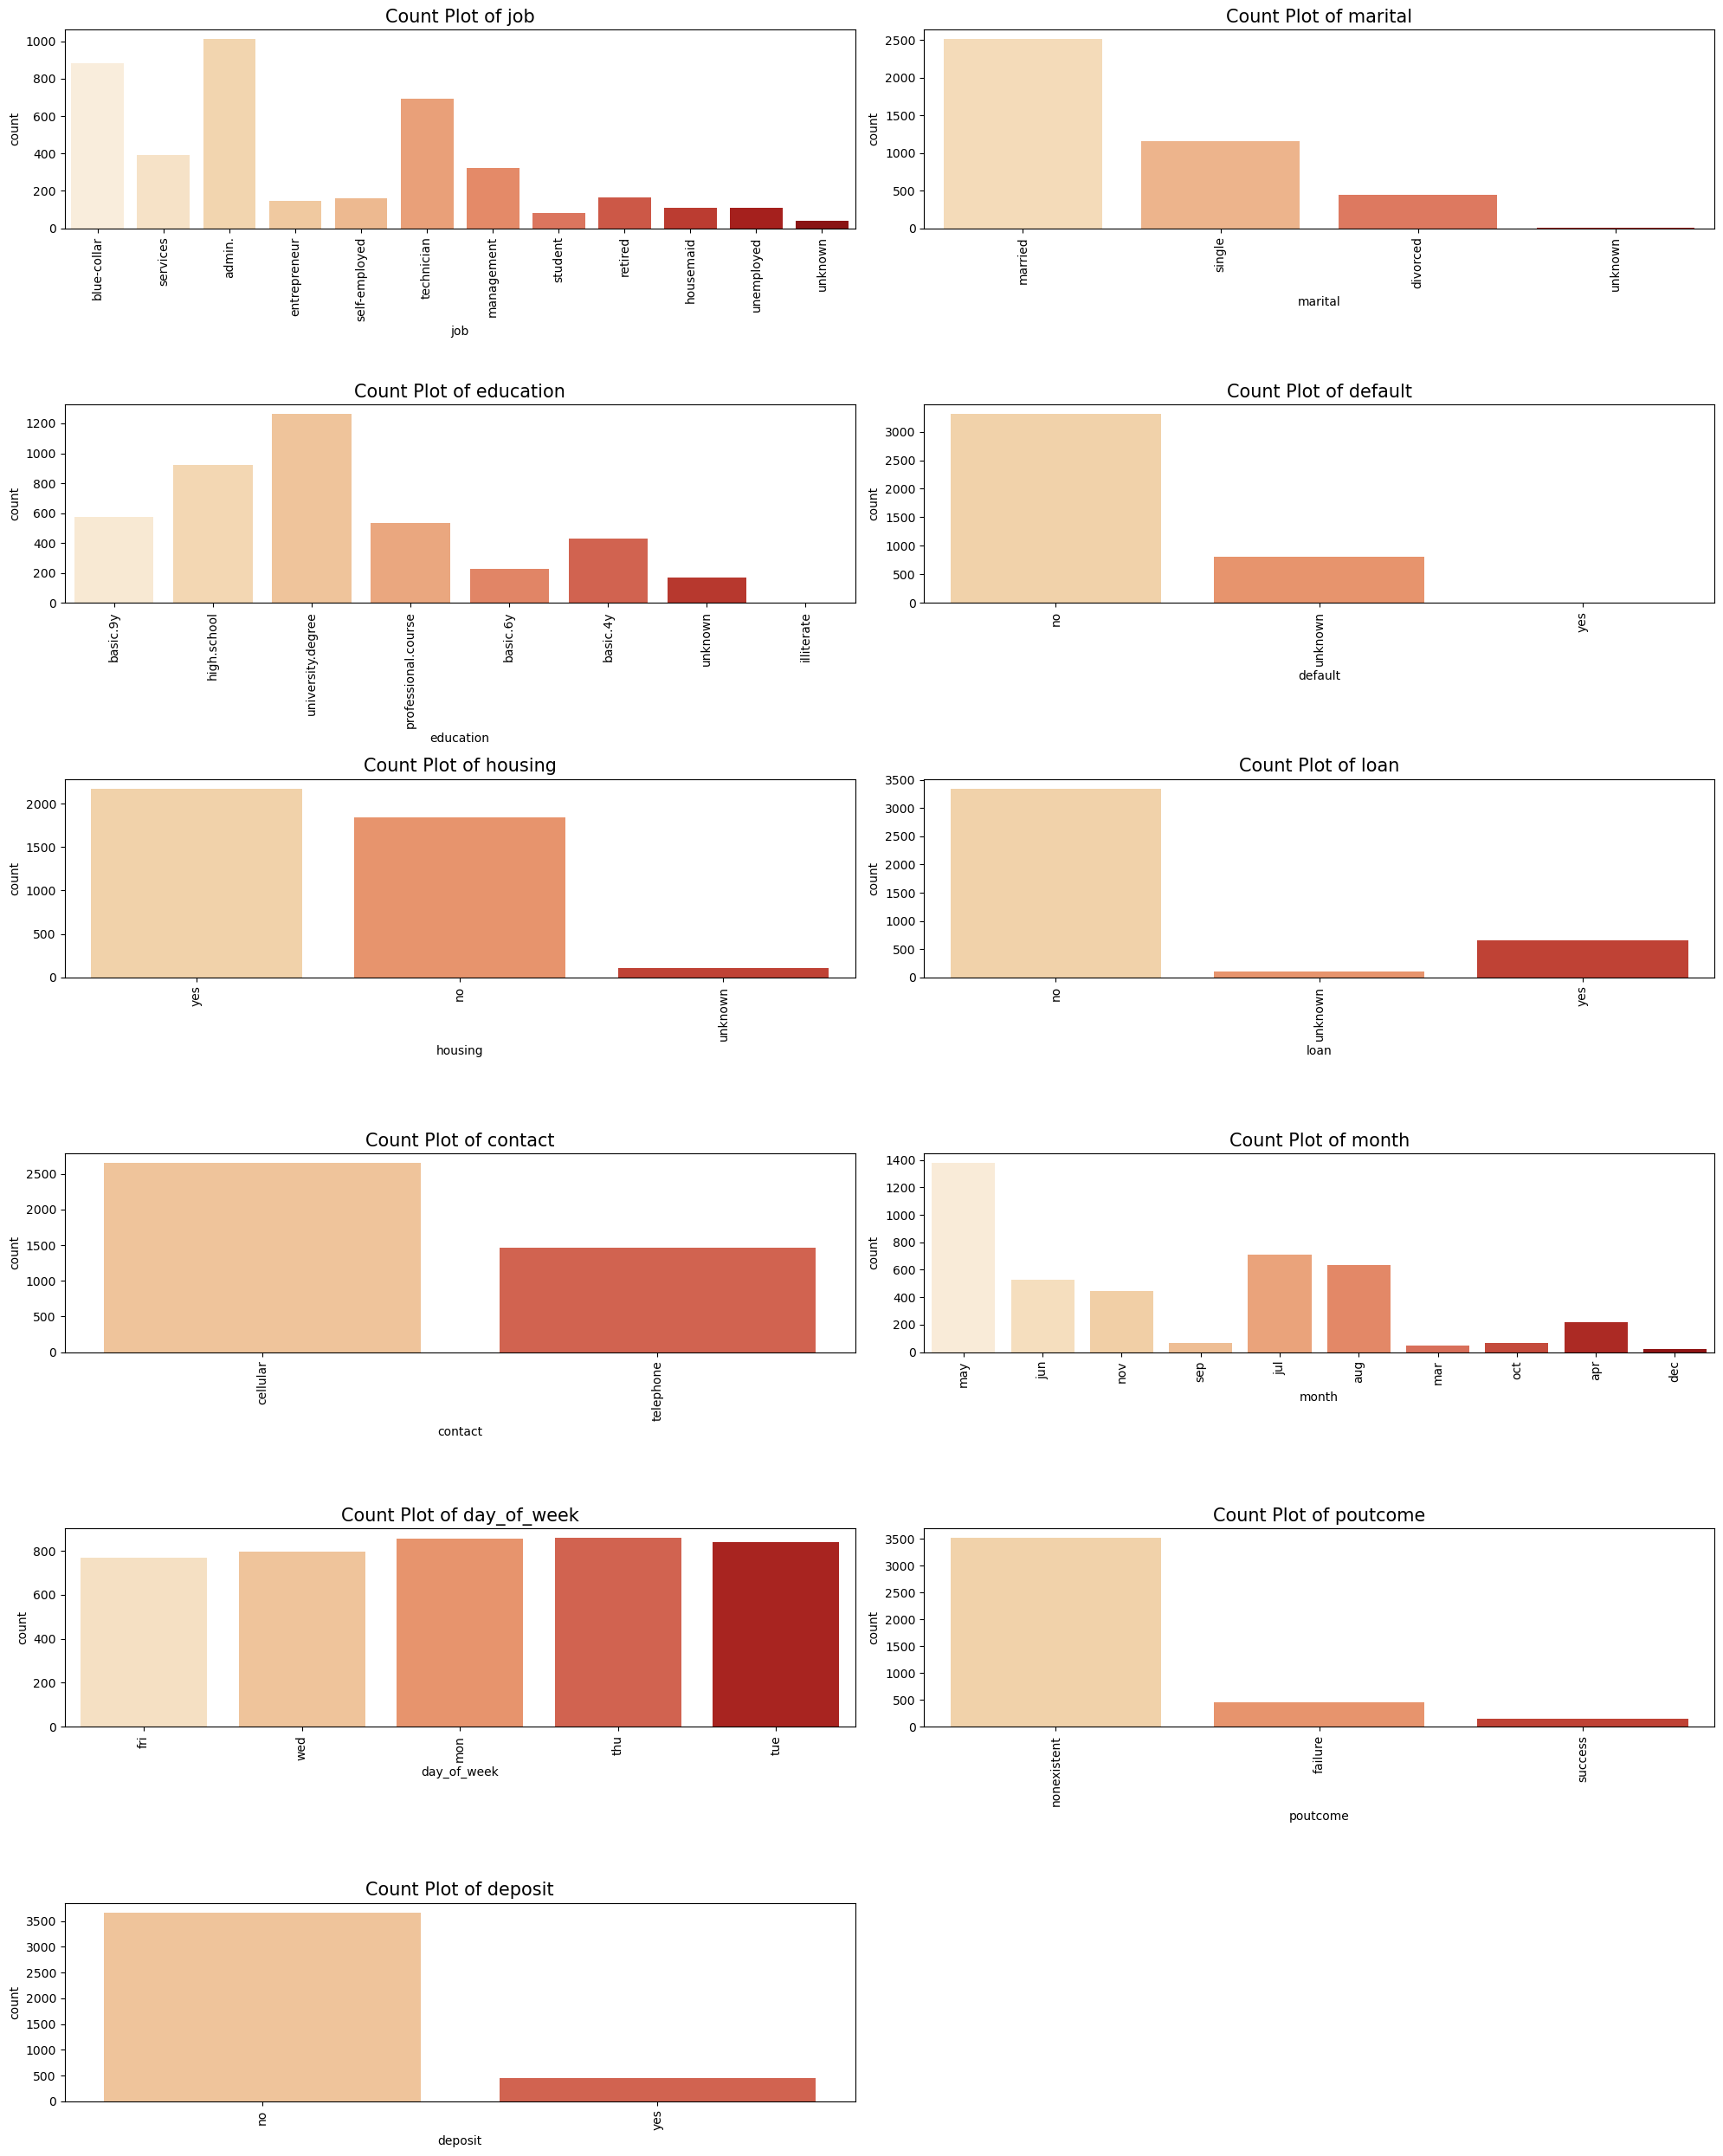

In [17]:
# Calculate number of plots, rows, and columns
num_plots = len(categorical_cols)
num_rows = (num_plots+1)//2 
num_cols = 2

# create new figure
plt.figure(figsize=(20,25))

# Create count plots for each categorical column
for i, col in enumerate(categorical_cols,1):
    plt.subplot(num_rows,num_cols,i)
    sns.countplot(x= col,data=df, palette = 'OrRd')
    plt.title(f"Count Plot of {col}", fontsize=15)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=90)

#Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()            

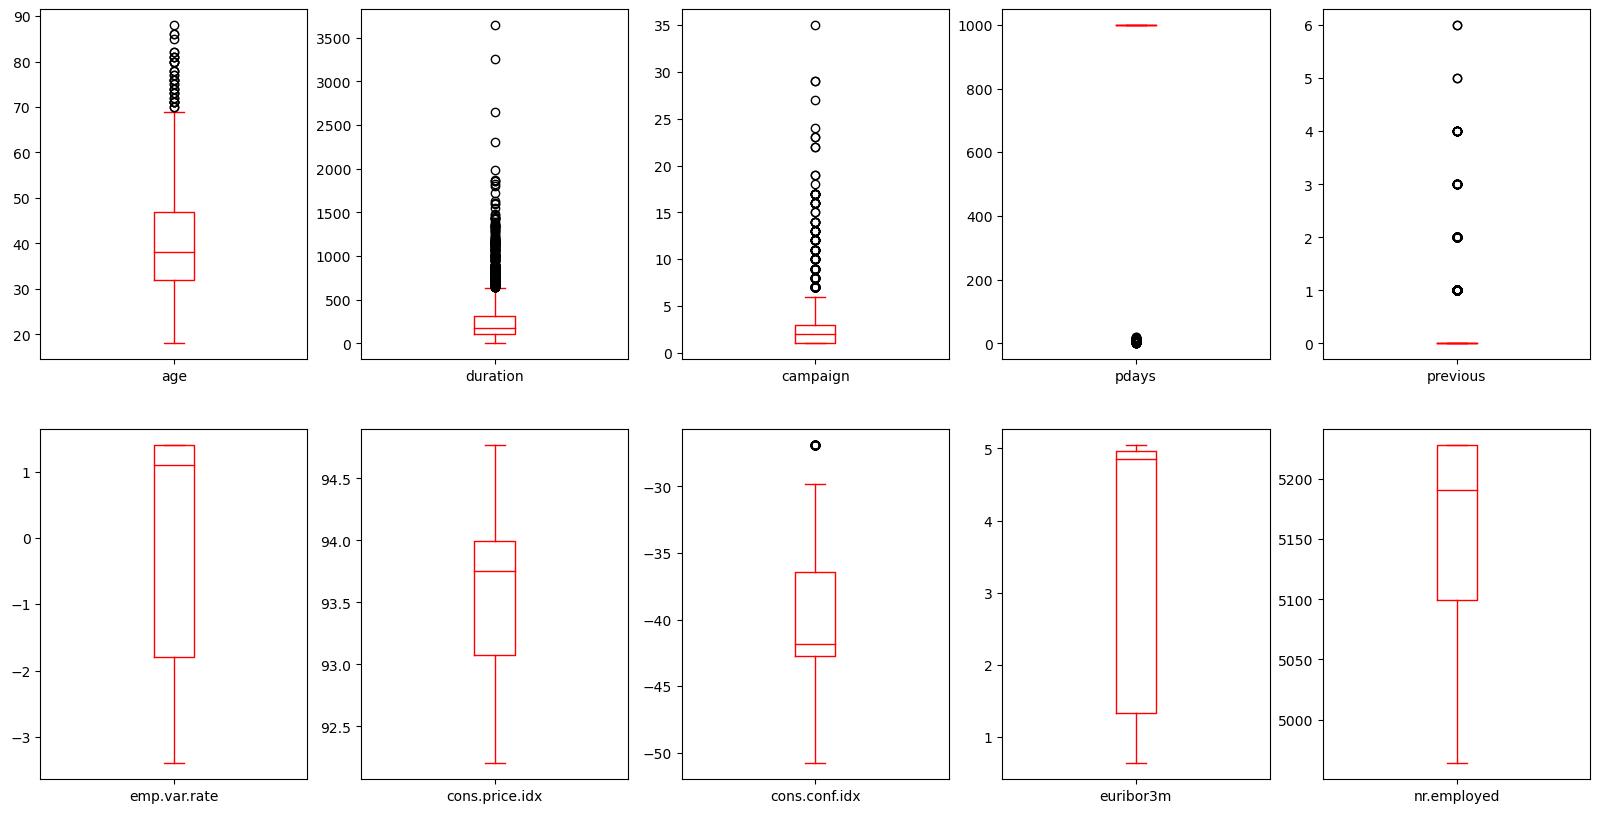

In [19]:
df.plot(kind='box',subplots= True,layout=(2,5),figsize=(20,10),color='r')
plt.show()


In [25]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q2 = df[col].quantile(0.5)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"{col}: Q1={Q1}, Q2={Q2}, Q3={Q3}, IQR={IQR}, Lower Bound={lower_bound}, Upper Bound={upper_bound}")

age: Q1=32.0, Q2=38.0, Q3=47.0, IQR=15.0, Lower Bound=9.5, Upper Bound=69.5
duration: Q1=103.0, Q2=181.0, Q3=317.0, IQR=214.0, Lower Bound=-218.0, Upper Bound=638.0
campaign: Q1=1.0, Q2=2.0, Q3=3.0, IQR=2.0, Lower Bound=-2.0, Upper Bound=6.0
pdays: Q1=999.0, Q2=999.0, Q3=999.0, IQR=0.0, Lower Bound=999.0, Upper Bound=999.0
previous: Q1=0.0, Q2=0.0, Q3=0.0, IQR=0.0, Lower Bound=0.0, Upper Bound=0.0
emp.var.rate: Q1=-1.8, Q2=1.1, Q3=1.4, IQR=3.2, Lower Bound=-6.6000000000000005, Upper Bound=6.200000000000001
cons.price.idx: Q1=93.075, Q2=93.749, Q3=93.994, IQR=0.9189999999999969, Lower Bound=91.69650000000001, Upper Bound=95.3725
cons.conf.idx: Q1=-42.7, Q2=-41.8, Q3=-36.4, IQR=6.300000000000004, Lower Bound=-52.150000000000006, Upper Bound=-26.949999999999992
euribor3m: Q1=1.334, Q2=4.857, Q3=4.961, IQR=3.6270000000000002, Lower Bound=-4.1065000000000005, Upper Bound=10.4015
nr.employed: Q1=5099.1, Q2=5191.0, Q3=5228.1, IQR=129.0, Lower Bound=4905.6, Upper Bound=5421.6


### Skewness and Data Distribution

In [28]:
skewness = df[numerical_cols].skew()
print("\nSkewness of numerical columns:\n", skewness)


Skewness of numerical columns:
 age               0.715694
duration          3.294781
campaign          4.003185
pdays            -4.775139
previous          4.022979
emp.var.rate     -0.727688
cons.price.idx   -0.216641
cons.conf.idx     0.287309
euribor3m        -0.715080
nr.employed      -1.075877
dtype: float64


## Correlation Matrix and Heatmap

                     age  duration  campaign     pdays  previous  \
age             1.000000  0.041299 -0.014169 -0.043425  0.050931   
duration        0.041299  1.000000 -0.085348 -0.046998  0.025724   
campaign       -0.014169 -0.085348  1.000000  0.058742 -0.091490   
pdays          -0.043425 -0.046998  0.058742  1.000000 -0.587941   
previous        0.050931  0.025724 -0.091490 -0.587941  1.000000   
emp.var.rate   -0.019192 -0.028848  0.176079  0.270684 -0.415238   
cons.price.idx -0.000482  0.016672  0.145021  0.058472 -0.164922   
cons.conf.idx   0.098135 -0.034745  0.007882 -0.092090 -0.051420   
euribor3m      -0.015033 -0.032329  0.159435  0.301478 -0.458851   
nr.employed    -0.041936 -0.044218  0.161037  0.381983 -0.514853   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.019192       -0.000482       0.098135  -0.015033   
duration           -0.028848        0.016672      -0.034745  -0.032329   
campaign            0.176079 

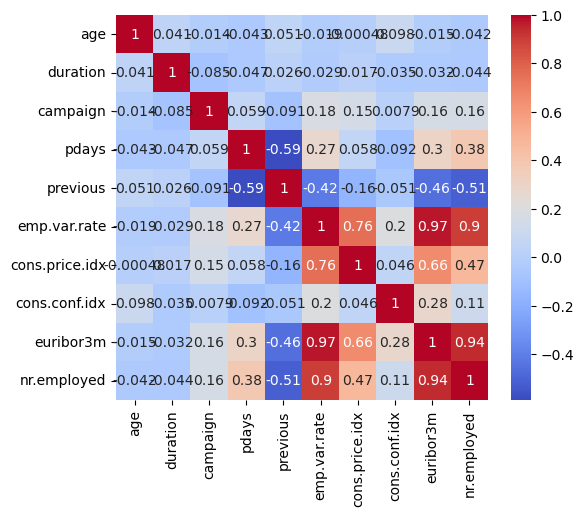

In [34]:
# Exclude non-numeric columns for correlation matrix
corr_matrix = df[numerical_cols].corr()
print(corr_matrix)
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


## High Correlation Columns

In [35]:
# Filter highly correlated columns
high_corr_cols = [col for col in corr_matrix.columns if any(corr_matrix[col] > 0.75)]
print("\nHighly correlated columns:", high_corr_cols)

# Create a copy and drop high correlation columns
data_copy = df.drop(high_corr_cols, axis=1)
print("\nShape after dropping high correlation columns:", data_copy.shape)



Highly correlated columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Shape after dropping high correlation columns: (4119, 11)


## Encode Categorical Data

In [40]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df_new= data_copy.apply(encoder.fit_transform)
df_new

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit
0,1,1,2,0,2,0,0,6,0,1,0
1,7,2,3,0,0,0,1,6,0,1,0
2,7,1,3,0,2,0,1,4,4,1,0
3,7,1,2,0,1,1,1,4,0,1,0
4,0,1,6,0,2,0,0,7,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4114,0,1,1,0,2,2,0,3,2,1,0
4115,0,1,3,0,2,0,1,3,0,1,0
4116,8,2,3,0,0,0,0,6,1,0,0
4117,0,1,3,0,0,0,0,1,0,1,0


In [41]:
# Check the values in the target column
print(df_new['deposit'].value_counts())

0    3668
1     451
Name: deposit, dtype: int64


## Drop Independent Variable and Check Shape and Type

In [42]:
# Drop target variable 'deposit' from features
X = df_new.drop('deposit', axis=1)
y = df_new['deposit']

print("\nShape of X:", X.shape)
print("\nShape of y:", y.shape)
print("\nType of X:", type(X))
print("\nType of y:", type(y))



Shape of X: (4119, 10)

Shape of y: (4119,)

Type of X: <class 'pandas.core.frame.DataFrame'>

Type of y: <class 'pandas.core.series.Series'>


## Model Selection and Training

In [43]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)


Training Shape: (2883, 10)
Testing Shape: (1236, 10)


## Build Decision Tree Classifier

#### Model Training and Evaluation

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

dt = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10)
dt.fit(X_train, y_train)

# Predictions
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

# Scores
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))


Training Accuracy: 0.9060006937218176
Testing Accuracy: 0.8988673139158576
Confusion Matrix:
 [[1092   13]
 [ 112   19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1105
           1       0.59      0.15      0.23       131

    accuracy                           0.90      1236
   macro avg       0.75      0.57      0.59      1236
weighted avg       0.87      0.90      0.87      1236



## Visualize the Decision Tree

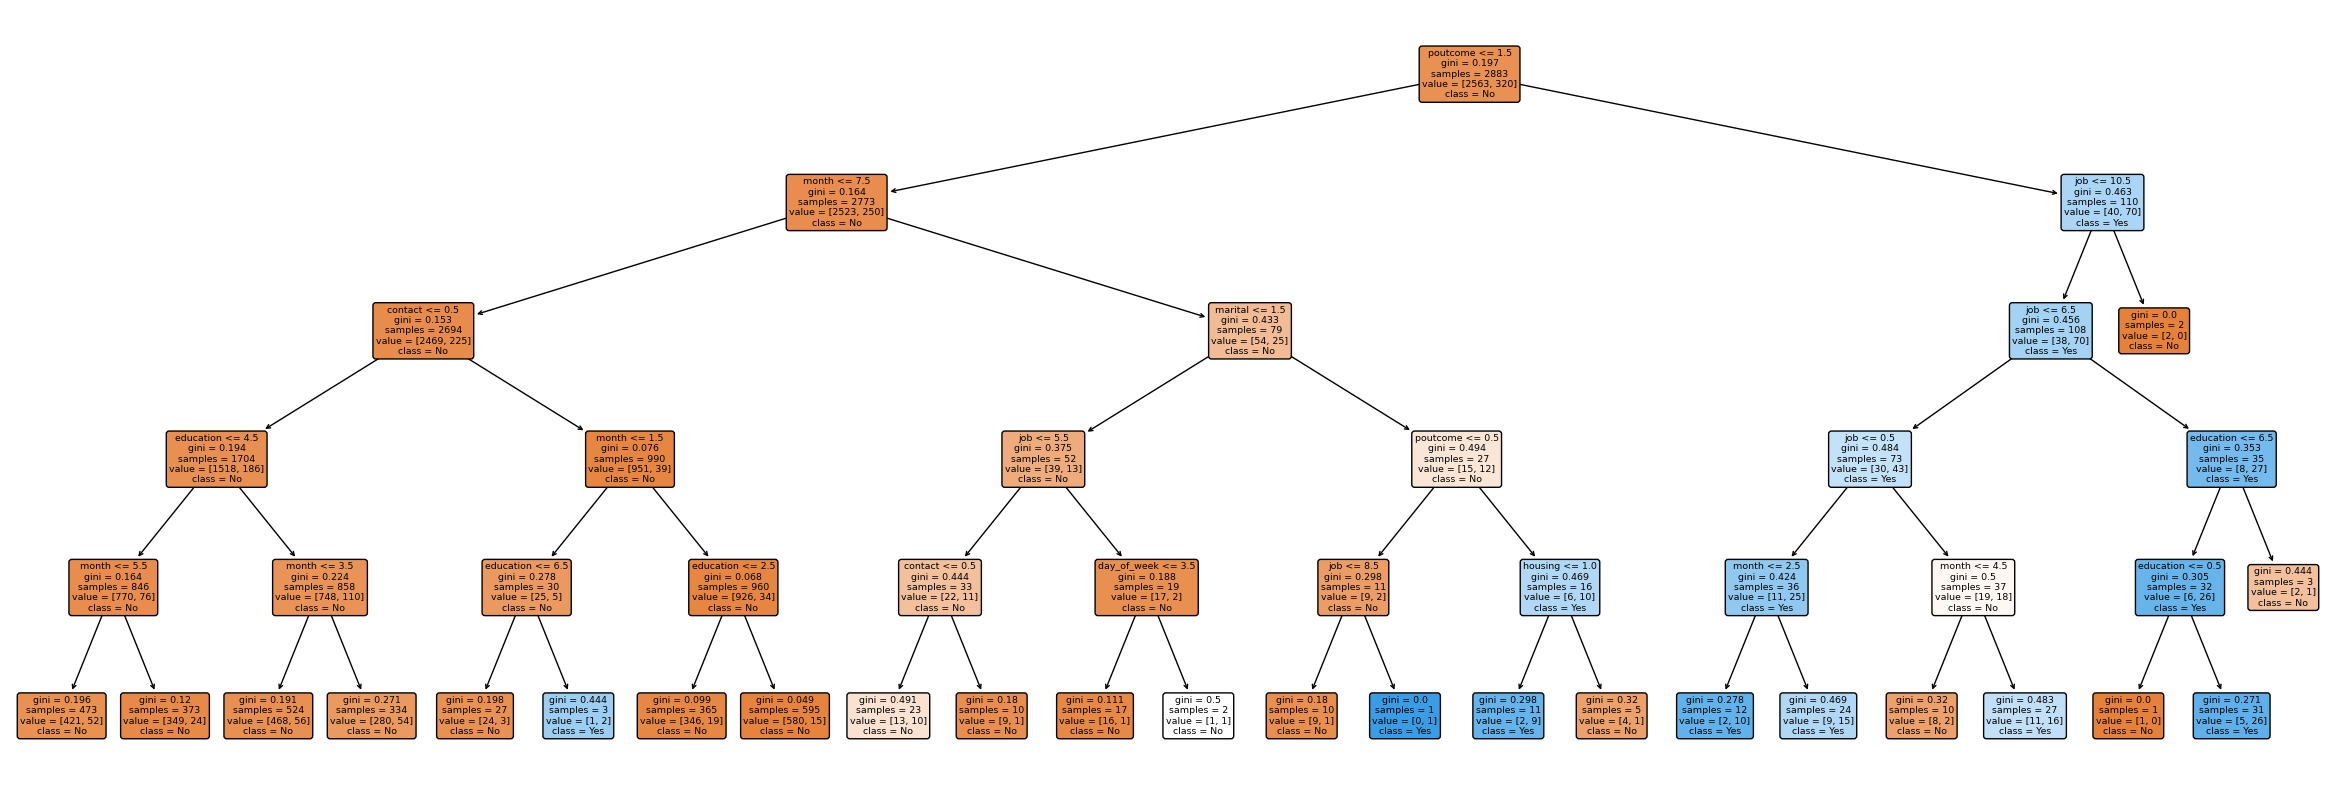

In [47]:
from sklearn.tree import plot_tree

fn = X_train.columns
cn = ['No', 'Yes']


plt.figure(figsize=(30, 10))
plot_tree(dt, feature_names=fn, class_names=cn, filled=True, rounded=True)
plt.show()

## Decision Tree with Specific Parameters

Training Accuracy: 0.9073881373569199
Testing Accuracy: 0.8940129449838188
Accuracy with specific parameters: 0.8940129449838188
Confusion Matrix with specific parameters:
 [[1072   33]
 [  98   33]]


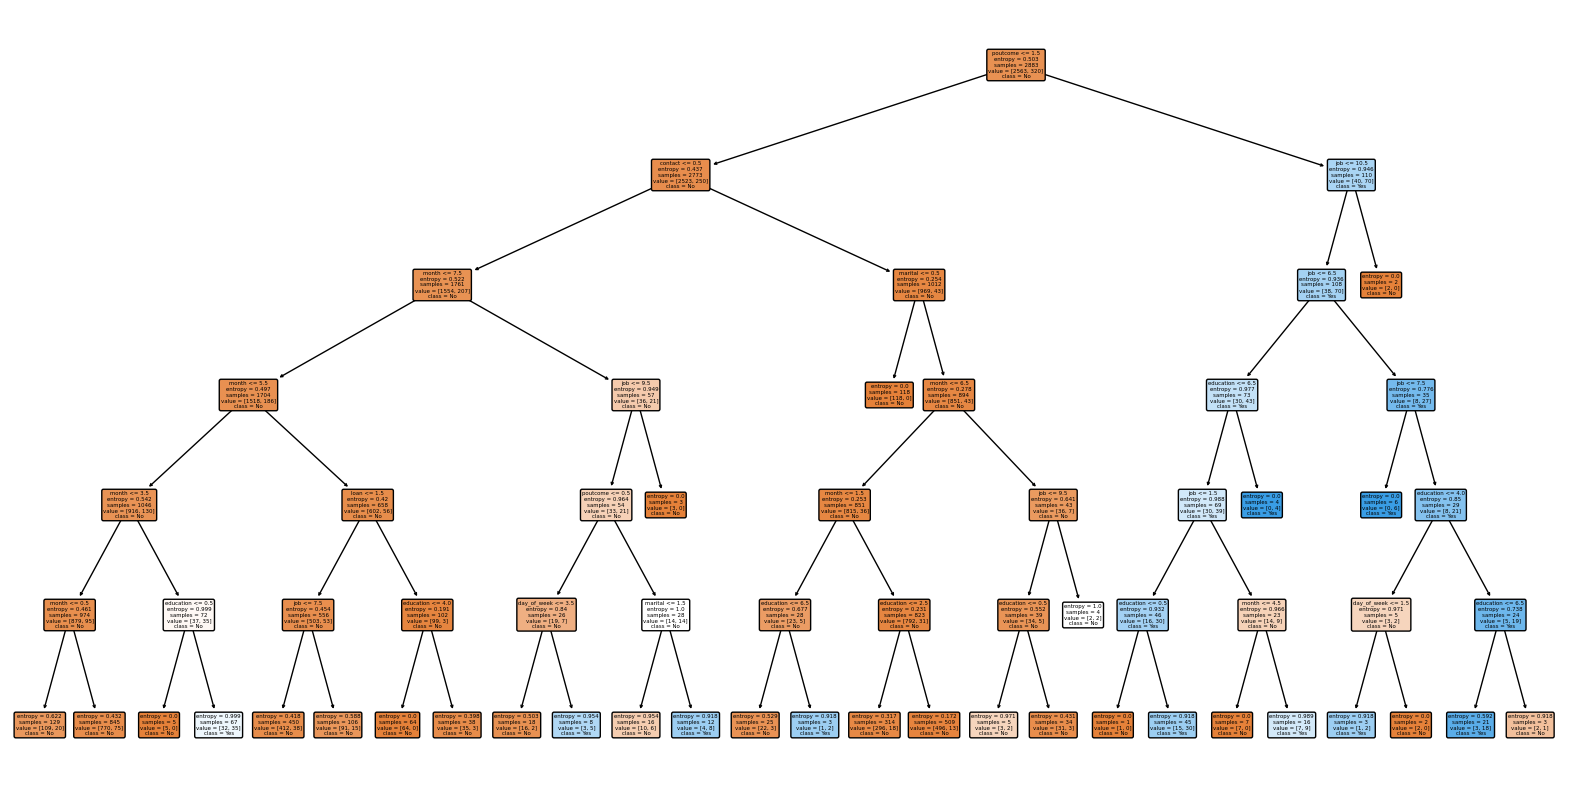

In [48]:
# Initialize Decision Tree with specific parameters
dt1 = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=5)
dt1.fit(X_train, y_train)

# Predict on the test set
y_pred1 = dt1.predict(X_test)

# Updated Scores
print("Training Accuracy:", dt1.score(X_train, y_train))
print("Testing Accuracy:", dt1.score(X_test, y_test))


# Calculate accuracy
accuracy1 = accuracy_score(y_test, y_pred1)
print(f"Accuracy with specific parameters: {accuracy1}")

# Confusion Matrix
conf_matrix1 = confusion_matrix(y_test, y_pred1)
print(f"Confusion Matrix with specific parameters:\n {conf_matrix1}")


# Updated Tree Plot
plt.figure(figsize=(20, 10))
plot_tree(dt1, feature_names=fn, class_names=cn, filled=True, rounded=True)
plt.show()

# Conclusion

- The Decision Tree Classifier successfully predicts customer purchase behavior with a significant accuracy rate. 
- The model provides interpretable insights into key factors influencing customer decisions, such as contact duration, marital status, and education level. 
- Businesses can leverage these insights to develop focused marketing strategies and improve decision-making processes.
- The project highlights the power of machine learning in deriving actionable insights from data and emphasizes the importance of continuous evaluation and tuning for optimal performance.